# Accountability on Federal Corporate Card

---------------------------------------------------------
#### Este projeto realiza uma análise exploratória de dados referntes aos gastos referentes ao cartão corporativo Federal entre 2019 e 2025. O objetivo é promover a transparência e fiscalizar o uso de verbas públicas, identificando padrões de consumo e ranking de despesas que muitas vezes passam despercebidas na divulgação convencional.

#### Todos os dados utilizados nesta pesquisa, bem como o dicionário de dados, foram retirados do Portal da Transparência, conforme o link: https://portaldatransparencia.gov.br/download-de-dados/cpgf

# Bibliotecas

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Config Complete")

# Importação e limpeza de dados

In [ ]:
lista_dados = []

for i in range(2019, 2026):
  for j in range(1, 13):
    caminho = f'Dados/{i}/{i}{j}_CPGF.csv'
    try:
      df = pd.read_csv(caminho, encoding = 'latin-1', sep = ";")
      lista_dados.append(df)
    except FileNotFoundError:
      print(f"Arquivo não encontrado: {caminho}")
    except Exception as e:
      print(f"Erro ao ler o arquivo {caminho}: {e}")


dados = pd.concat(lista_dados, ignore_index=True)
print("Importação e concatenação concluídas.")

In [85]:
print(f"O dataframe possui {dados.shape[0]} linhas e {dados.shape[1]} colunas!")

O dataframe possui 807954 linhas e 15 colunas!


In [86]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807954 entries, 0 to 807953
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR   807954 non-null  int64 
 1   NOME ÓRGÃO SUPERIOR     807954 non-null  object
 2   CÓDIGO ÓRGÃO            807954 non-null  int64 
 3   NOME ÓRGÃO              807954 non-null  object
 4   CÓDIGO UNIDADE GESTORA  807954 non-null  int64 
 5   NOME UNIDADE GESTORA    807954 non-null  object
 6   ANO EXTRATO             807954 non-null  int64 
 7   MÊS EXTRATO             807954 non-null  int64 
 8   CPF PORTADOR            618983 non-null  object
 9   NOME PORTADOR           807954 non-null  object
 10  CNPJ OU CPF FAVORECIDO  807954 non-null  int64 
 11  NOME FAVORECIDO         807954 non-null  object
 12  TRANSAÇÃO               807954 non-null  object
 13  DATA TRANSAÇÃO          618983 non-null  object
 14  VALOR TRANSAÇÃO         807954 non-n

In [87]:
# Mudar o tipo da coluna valor transação para float
dados['VALOR TRANSAÇÃO'] = dados['VALOR TRANSAÇÃO'].astype(str).str.replace(',', '.', regex=True).astype(float)

# Mudar o tipo das colunas ano e mês para str
dados['ANO EXTRATO'] = dados['ANO EXTRATO'].astype(str)
dados['MÊS EXTRATO'] = dados['MÊS EXTRATO'].astype(str)

In [88]:
# Adicionar nova linha para melhorar visualização dos dados
conditions = [
    dados['CNPJ OU CPF FAVORECIDO'] == -11, # Sigiloso
    dados['CNPJ OU CPF FAVORECIDO'] == -2, # Não se aplica
    dados['CNPJ OU CPF FAVORECIDO'] == -1 # Sem informação
]
choices = ['Sigiloso', 'Não se aplica', 'Sem informação']

dados['Status'] = np.select(conditions, choices, default='Visível')

print("Coluna 'Status' criada com sucesso!")
dados.head()

Coluna 'Status' criada com sucesso!


,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,ANO EXTRATO,MÊS EXTRATO,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO,Status
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110161,SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO,2019,1,***.525.153-**,IVALDO SEVERIANO MENDES,2776314000106,MADEIREIRA SIAFORT INDUSTRIA E COMERCIO DE MAD...,COMPRA A/V - R$ - APRES,29/11/2018,258.9,Visível
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110161,SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO,2019,1,***.667.881-**,BERNARDO BARCA GONCALVES TEIXEIRA ARANTES,5428208000120,RGN - SOM ELETRONICA E INFORMATICA LTDA,COMPRA A/V - R$ - APRES,17/12/2018,689.8,Visível
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110161,SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO,2019,1,***.364.502-**,ARLINDO PASSOS DO NASCIMENTO,-2,NAO SE APLICA,SAQUE CASH/ATM BB,07/12/2018,480.0,Não se aplica
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110161,SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO,2019,1,***.212.021-**,SYLVIO EDGARD DE CASTRO,-2,NAO SE APLICA,SAQUE CASH/ATM BB,06/12/2018,170.0,Não se aplica
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110161,SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO,2019,1,***.667.881-**,BERNARDO BARCA GONCALVES TEIXEIRA ARANTES,-2,NAO SE APLICA,SAQUE CASH/ATM BB,04/12/2018,480.0,Não se aplica


In [89]:
# Mostrar quantidade de valores nulos em cada coluna
dados.isnull().sum()

,0
CÓDIGO ÓRGÃO SUPERIOR,0
NOME ÓRGÃO SUPERIOR,0
CÓDIGO ÓRGÃO,0
NOME ÓRGÃO,0
CÓDIGO UNIDADE GESTORA,0
NOME UNIDADE GESTORA,0
ANO EXTRATO,0
MÊS EXTRATO,0
CPF PORTADOR,188971
NOME PORTADOR,0


In [90]:
# Mostrar linhas com dados vazios
dados[dados.isnull().any(axis=1)]

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,ANO EXTRATO,MÊS EXTRATO,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO,Status
2669,25000,Ministério da Fazenda,25915,Fundo Constitucional do Distrito Federal,170395,FCDF±SSP ± POLICIA CIVIL DO DF,2019,1,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00,Sigiloso
2670,25000,Ministério da Fazenda,25915,Fundo Constitucional do Distrito Federal,170395,FCDF±SSP ± POLICIA CIVIL DO DF,2019,1,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00,Sigiloso
2671,25000,Ministério da Fazenda,25915,Fundo Constitucional do Distrito Federal,170395,FCDF±SSP ± POLICIA CIVIL DO DF,2019,1,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00,Sigiloso
2672,25000,Ministério da Fazenda,25915,Fundo Constitucional do Distrito Federal,170395,FCDF±SSP ± POLICIA CIVIL DO DF,2019,1,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00,Sigiloso
2673,25000,Ministério da Fazenda,25915,Fundo Constitucional do Distrito Federal,170395,FCDF±SSP ± POLICIA CIVIL DO DF,2019,1,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00,Sigiloso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807922,20000,Presidência da República,20101,Presidência da República,110322,GABINETE DE SEGURANCA INSTITUCIONAL/PR,2025,10,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,8223.04,Sigiloso
807923,20000,Presidência da República,20101,Presidência da República,110322,GABINETE DE SEGURANCA INSTITUCIONAL/PR,2025,10,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,700.00,Sigiloso
807924,20000,Presidência da República,20101,Presidência da República,110322,GABINETE DE SEGURANCA INSTITUCIONAL/PR,2025,10,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,99.90,Sigiloso
807925,20000,Presidência da República,20101,Presidência da República,110322,GABINETE DE SEGURANCA INSTITUCIONAL/PR,2025,10,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,420.00,Sigiloso


In [91]:
# Array com o nome de todos os órgãos superiores
dados['NOME ÓRGÃO SUPERIOR'].unique()

array(['Advocacia-Geral da União',
       'Banco Central do Brasil - Orçamento Fiscal e',
       'Controladoria-Geral da União',
       'Ministério da Agricultura e Pecuária',
       'Ministério da Ciência, Tecnologia e Inovaç',
       'Ministério da Cultura', 'Ministério da Defesa',
       'Ministério da Educação', 'Ministério da Fazenda',
       'Ministério da Gestão e da Inovação em Ser',
       'Ministério da Integração e do Desenvolvime',
       'Ministério da Justiça e Segurança Pública',
       'Ministério da Previdência Social', 'Ministério da Saúde',
       'Ministério das Cidades', 'Ministério das Comunicações',
       'Ministério das Relações Exteriores',
       'Ministério de Minas e Energia',
       'Ministério de Portos e Aeroportos',
       'Ministério do Desenvolvimento Agrário e Agr',
       'Ministério do Desenvolvimento, Indústria, C',
       'Ministério do Meio Ambiente e Mudança do Cl',
       'Ministério do Planejamento e Orçamento',
       'Ministério do Trabalho

# Ranking dos Órgãos Superiores que mais gastam (2019 - 2025)

In [92]:
# Top 10 ministérios que mais gastam

gastos_ministerios = dados.groupby('NOME ÓRGÃO SUPERIOR')['VALOR TRANSAÇÃO'].sum().sort_values(ascending=False).head(10)
display(gastos_ministerios.apply(lambda x: f'{x:.2f}'))

,VALOR TRANSAÇÃO
NOME ÓRGÃO SUPERIOR,
Ministério da Justiça e Segurança Pública,147816595.77
Presidência da República,127042573.02
Ministério da Defesa,55218036.20
Ministério da Educação,52427396.84
Ministério do Planejamento e Orçamento,44364812.22
Ministério da Fazenda,15119106.00
Ministério do Meio Ambiente e Mudança do Cl,14124847.03
Ministério da Saúde,12713260.01
Ministério da Agricultura e Pecuária,10871681.27


/tmp/ipython-input-2597946465.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




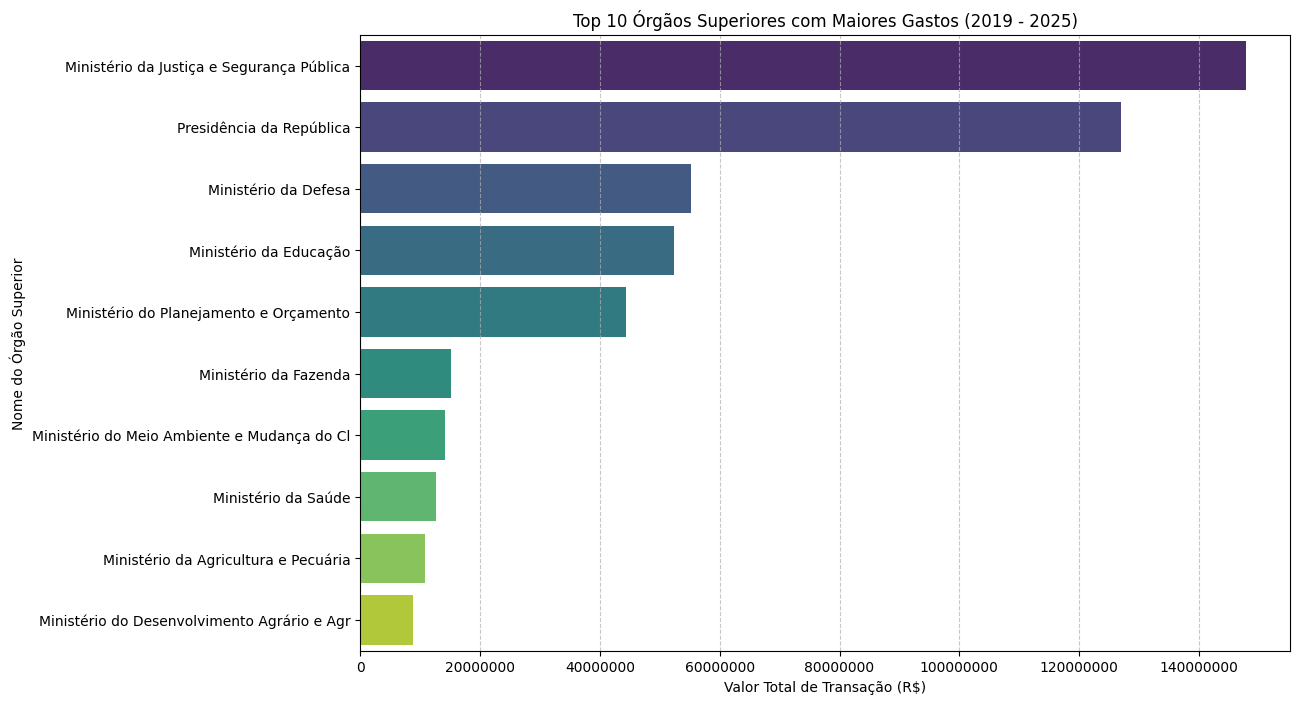

In [93]:
# Top 10 ministérios que mais gastam

plt.figure(figsize=(12, 8))
sns.barplot(x=gastos_ministerios.values, y=gastos_ministerios.index, palette='viridis')
plt.title('Top 10 Órgãos Superiores com Maiores Gastos (2019 - 2025)')
plt.xlabel('Valor Total de Transação (R$)')
plt.ylabel('Nome do Órgão Superior')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [94]:
# Top 10 órgãos superiores que mais gastam

fig = go.Figure(data=[go.Bar(
    x=gastos_ministerios.values,
    y=gastos_ministerios.index,
    orientation='h',
    text=gastos_ministerios.values,
    hovertemplate = f'Órgão: %{{y}}<br>Valor: %{{x:,.2f}} R$<extra></extra>',
    texttemplate='%{text:,.2f}',
    marker=dict(
        color=gastos_ministerios.values,
        colorscale='Viridis',
        showscale=True
    )
)])

# Layout para melhor visualização
fig.update_layout(
    title_text='Top 10 Órgãos Superiores com Maiores Gastos (2019 - 2025)',
    xaxis_title='Valor Total de Transação (R$)',
    yaxis_title='Nome do Órgão Superior',
    height=600,
    yaxis = dict(autorange='reversed')
)

fig.show()

# Comparação dos Gastos Anuais Referentes à Presidência da República (2019 - 2025)

In [95]:
# Evolução do gasto anual da presidência da república no cartão corporativo federal (2019 - 2025)

gastos_presidencia = dados.loc[dados['CÓDIGO ÓRGÃO SUPERIOR'] == 20000].groupby('ANO EXTRATO')['VALOR TRANSAÇÃO'].sum()

fig = go.Figure(data=[go.Bar(
    x=gastos_presidencia.index,
    y=gastos_presidencia.values,
    text=gastos_presidencia.values,
    texttemplate='%{text:,.2f}',
    hovertemplate = f'Ano: %{{x}}<br>Valor: %{{y:,.2f}} R$<extra></extra>'
    )])

# Layout para melhor visualização
fig.update_layout(
    title_text='Evolução Anual dos Gastos da Presidência da República no Cartão Corporativo Federal (2019 - 2025)',
    xaxis_title='Ano',
    yaxis_title='Valor Total de Transação (R$)',
    height=600
)

fig.show()

In [96]:
# Evolução do gasto anual, por status, referente à presidência da república no cartão corporativo federal (2019 - 2025)

gastos_por_status_anual_presidencia = dados.loc[dados['CÓDIGO ÓRGÃO SUPERIOR'] == 20000].groupby(['ANO EXTRATO', 'Status'])['VALOR TRANSAÇÃO'].sum().unstack(fill_value=0)

fig = go.Figure()

for status_col in gastos_por_status_anual_presidencia.columns:
    fig.add_trace(go.Bar(
        x = gastos_por_status_anual_presidencia.index,
        y = gastos_por_status_anual_presidencia[status_col],
        name = status_col,
        hovertemplate = f'Ano: %{{x}}<br>Status: {status_col}<br>Valor: %{{y:,.2f}} R$<extra></extra>'
    ))

fig.update_layout(
    title_text='Evolução do gasto anual, por status, referente à presidência da república no cartão corporativo federal (2019 - 2025)',
    xaxis_title='Ano',
    yaxis_title='Valor Total de Transação (R$)',
    barmode='stack',
    height=600,
    legend_title_text='Status',
    margin=dict(t=100)
)

fig.show()

In [97]:
#Distribuição Percentual dos Gastos Referentes à Presidência da República no Cartão Corporativo Federal por Status (2019 - 2025)

gastos_por_status_presidencia = dados.loc[dados['CÓDIGO ÓRGÃO SUPERIOR'] == 20000].groupby(['Status'])['VALOR TRANSAÇÃO'].sum()

fig = go.Figure(data=[go.Pie(
    labels = gastos_por_status_presidencia.index,
    values = gastos_por_status_presidencia.values,
    hole = 0.4,
    hovertemplate = '<b>%{label}</b><br>Valor: R$ %{value:,.2f}<br>Porcentagem: %{percent}<extra></extra>',
    textinfo = 'percent+value',
    texttemplate = '%{percent}',
    marker = dict(line=dict(color='#000000', width=1))
)])

fig.update_layout(
    title_text = 'Distribuição Percentual dos Gastos Referentes à Presidência da República no Cartão Corporativo Federal por Status (2019 - 2025)',
    height = 600
)

fig.show()

**Transparência vs. Segurança: O Caso da Presidência**

O dado mais alarmante desta análise reside na Presidência da República. Dos gastos totais computados entre 2019 e 2025, uma fração esmagadora de **98,6%** encontra-se sob sigilo.

Embora o sigilo seja amparado pela **Lei de Acesso à Informação (LAI)** para despesas que possam colocar em risco a segurança do Estado e do Presidente, a magnitude dessa porcentagem levanta questões sobre o equilíbrio entre segurança e transparência pública. Na prática, isso significa que a sociedade tem acesso a detalhes de menos de **1,5%** de como o cartão corporativo presidencial é utilizado.

In [98]:
# Evolução do Gasto Médio Anual Referente à Presidência da República no Cartão Corporativo Federal (2019 - 2025)

gasto_medio_anual_presidencia = dados.loc[dados['CÓDIGO ÓRGÃO SUPERIOR'] == 20000].groupby(['ANO EXTRATO'])['VALOR TRANSAÇÃO'].mean()

fig = go.Figure(data=[go.Scatter(
    x=gasto_medio_anual_presidencia.index,
    y=gasto_medio_anual_presidencia.values,
    text=gasto_medio_anual_presidencia.values,
    texttemplate='%{text:,.2f}',
    hovertemplate = f'Ano: %{{x}}<br>Valor: %{{y:,.2f}} R$<extra></extra>'
    )])

# Layout para melhor visualização
fig.update_layout(
    title_text='Evolução do Gasto Médio Anual Referente à Presidência da República no Cartão Corporativo Federal (2019 - 2025)',
    xaxis_title='Ano',
    yaxis_title='Valor Médio Gasto (R$)',
    height=600
)

fig.show()

In [99]:
# Evolução do Número de Registros Referentes à Presidência da República no Cartão Corporativo Federal (2019 - 2025)

num_registros_presidencia = dados.loc[dados['CÓDIGO ÓRGÃO SUPERIOR'] == 20000].groupby(['ANO EXTRATO']).size()

fig = go.Figure(data=[go.Scatter(
    x=num_registros_presidencia.index,
    y=num_registros_presidencia.values,
    text=num_registros_presidencia.values,
    texttemplate='%{text:,.2f}',
    hovertemplate = f'Ano: %{{x}}<br>Valor: %{{y:,.2f}} R$<extra></extra>'
    )])

# Layout para melhor visualização
fig.update_layout(
    title_text='Evolução do Número de Registros Referentes à Presidência da República no Cartão Corporativo Federal (2019 - 2025)',
    xaxis_title='Ano',
    yaxis_title='Nª de Registros',
    height=600
)

fig.show()

# Evolução do Gasto Anual no Cartão Corporativo Federal (2019 - 2025)

In [100]:
gastos_por_status_anual = dados.groupby(['ANO EXTRATO', 'Status'])['VALOR TRANSAÇÃO'].sum().unstack(fill_value=0)
gastos_anual = dados.groupby(['ANO EXTRATO'])['VALOR TRANSAÇÃO'].sum()

print(gastos_por_status_anual)
print("-------------------------------------")
print(gastos_anual)

Status       Não se aplica  Sem informação     Sigiloso      Visível
ANO EXTRATO                                                         
2019            5005447.31      3753626.38  25822034.40  17704560.35
2020            4159258.45      2806598.95  29785294.09  17525869.30
2021            4102853.77       648616.88  33707805.54  19184392.93
2022           10059340.25      2531604.67  44916374.40  32767742.59
2023            8705202.60      3701619.54  44716508.31  33519509.53
2024            6173703.12      4417388.29  44134905.59  45762841.19
2025            7465322.00      4824165.06  25201848.13  39760489.65
-------------------------------------
ANO EXTRATO
2019    5.228567e+07
2020    5.427702e+07
2021    5.764367e+07
2022    9.027506e+07
2023    9.064284e+07
2024    1.004888e+08
2025    7.725182e+07
Name: VALOR TRANSAÇÃO, dtype: float64


In [101]:
# Evolução do gasto anual no cartão corporativo federal (2019 - 2025)

fig = go.Figure(data=[go.Bar(
    x=gastos_anual.index,
    y=gastos_anual.values,
    text=gastos_anual.values,
    texttemplate='%{text:,.2f}',
    textposition='outside',
    hovertemplate = f'Ano: %{{x}}<br>Valor: %{{y:,.2f}} R$<extra></extra>'
    )])

# Layout para melhor visualização
fig.update_layout(
    title_text='Evolução Anual dos Gastos no Cartão Corporativo Federal (2019 - 2025)',
    xaxis_title='Ano',
    yaxis_title='Valor Total de Transação (R$)',
    height=600
)

fig.show()

In [102]:
# Evolução do gasto anual, por status, no cartão corporativo federal (2019 - 2025)

fig = go.Figure()

for status_col in gastos_por_status_anual.columns:
    fig.add_trace(go.Bar(
        x = gastos_por_status_anual.index,
        y = gastos_por_status_anual[status_col],
        name = status_col,
        hovertemplate = f'Ano: %{{x}}<br>Status: {status_col}<br>Valor: %{{y:,.2f}} R$<extra></extra>'
    ))

fig.update_layout(
    title_text='Evolução Anual dos Gastos no Cartão Corporativo Federal por Status (2019 -  2025)',
    xaxis_title='Ano',
    yaxis_title='Valor Total de Transação (R$)',
    barmode='stack',
    height=600,
    legend_title_text='Status',
    margin=dict(t=100)
)

fig.show()

# Porcentagem dos tipos de transações no cartão corporativo federal (2019 - 2025)

In [103]:
gastos_por_status = dados.groupby(['Status'])['VALOR TRANSAÇÃO'].sum()

fig = go.Figure(data=[go.Pie(
    labels = gastos_por_status.index,
    values = gastos_por_status.values,
    hole = 0.4,
    hovertemplate = '<b>%{label}</b><br>Valor: R$ %{value:,.2f}<br>Porcentagem: %{percent}<extra></extra>',
    textinfo = 'percent+value',
    texttemplate = '%{percent}',
    marker = dict(line=dict(color='#000000', width=1))
)])

fig.update_layout(
    title_text = 'Distribuição Percentual dos Gastos no Cartão Corporativo por Status (2019 - 2025)',
    height = 600
)

fig.show()

# Evolução do Gasto Médio Anual do Cartão Corporativo Federal (2019 - 2025)

In [104]:
gasto_medio_anual = dados.groupby(['ANO EXTRATO'])['VALOR TRANSAÇÃO'].mean()

print(gasto_medio_anual)

ANO EXTRATO
2019    452.764251
2020    672.244498
2021    694.301276
2022    660.774864
2023    676.519883
2024    712.444261
2025    659.950493
Name: VALOR TRANSAÇÃO, dtype: float64


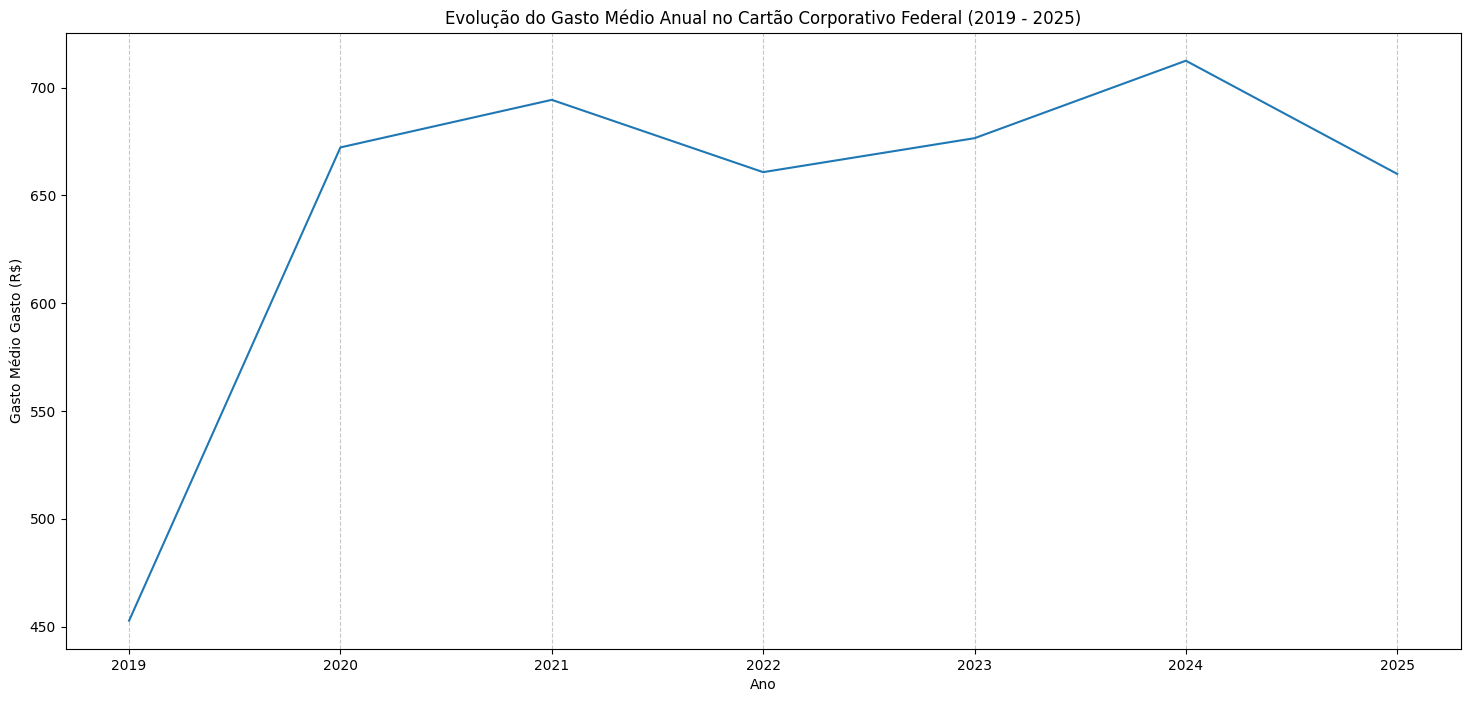

In [105]:
# Evolução do Gasto Médio Anual no Cartão Corporativo Federal (2019 - 2025)

plt.figure(figsize=(18, 8))
sns.lineplot(x=gasto_medio_anual.index, y=gasto_medio_anual.values)
plt.title('Evolução do Gasto Médio Anual no Cartão Corporativo Federal (2019 - 2025)')
plt.xlabel('Ano')
plt.ylabel('Gasto Médio Gasto (R$)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [106]:
# Evolução do Gasto Médio Anual no Cartão Corporativo Federal (2019 - 2025)

fig = go.Figure(data=[go.Scatter(
    x=gasto_medio_anual.index,
    y=gasto_medio_anual.values,
    text=gasto_medio_anual.values,
    texttemplate='%{text:,.2f}',
    hovertemplate = f'Ano: %{{x}}<br>Valor: %{{y:,.2f}} R$<extra></extra>'
    )])

# Layout para melhor visualização
fig.update_layout(
    title_text='Evolução do Gasto Médio Anual no Cartão Corporativo Federal (2019 - 2025)',
    xaxis_title='Ano',
    yaxis_title='Valor Médio Gasto (R$)',
    height=600
)

fig.show()

# Evolução do Número de Registros Anuais no Cartão Corporativo Federal (2019 - 2025)

In [107]:
numero_registros_anual = dados.groupby(['ANO EXTRATO']).size()

print(numero_registros_anual)

ANO EXTRATO
2019    115481
2020     80740
2021     83024
2022    136620
2023    133984
2024    141048
2025    117057
dtype: int64


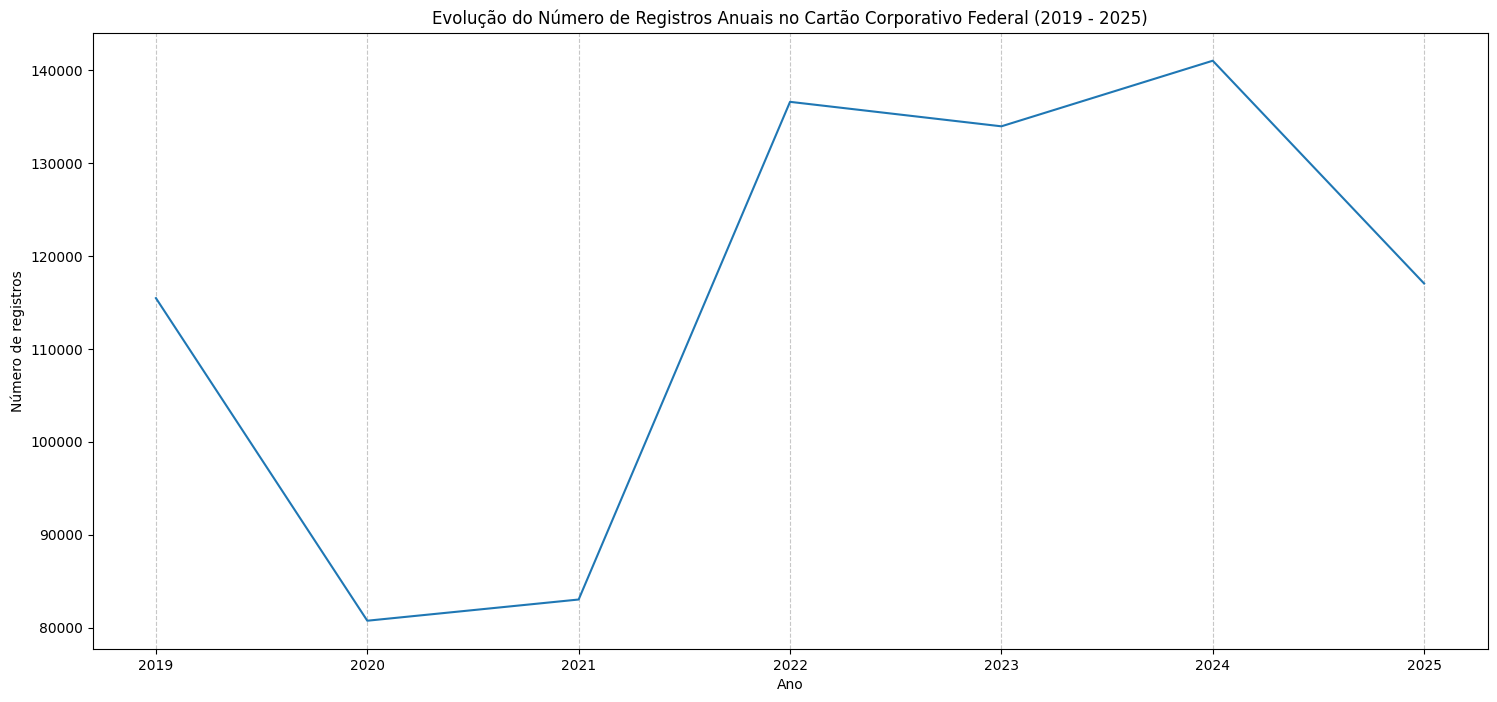

In [108]:
# Evolução do Número de Registros Anuais no Cartão Corporativo Federal (2019 - 2025)

plt.figure(figsize=(18, 8))
sns.lineplot(x=numero_registros_anual.index, y=numero_registros_anual.values)
plt.title('Evolução do Número de Registros Anuais no Cartão Corporativo Federal (2019 - 2025)')
plt.xlabel('Ano')
plt.ylabel('Número de registros')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [109]:
# Evolução do Gasto Médio Anual no Cartão Corporativo Federal (2019 - 2025)

fig = go.Figure(data=[go.Scatter(
    x=numero_registros_anual.index,
    y=numero_registros_anual.values,
    text=numero_registros_anual.values,
    texttemplate='%{text:,.2f}',
    hovertemplate = f'Ano: %{{x}}<br>Nª de registros: %{{y}}<extra></extra>'
    )])

# Layout para melhor visualização
fig.update_layout(
    title_text='Evolução do Número de Registros Anuais no Cartão Corporativo Federal (2019 - 2025)',
    xaxis_title='Ano',
    yaxis_title='Nª de registros',
    height=600
)

fig.show()